# Ex - 4
## BigGIS for BigDATA (Quantum Computing)
### Ashutosh Kumar Jha (Scientist/Engineer SF), IIRS, ISRO
### Sudikin Pramanik (Quantum computing coordinator), Student, IIRS, ISRO
`Running a quantum circuit`

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
!pip install qiskit qiskit_aer qiskit_ibm_runtime pylatexenc cython

In [73]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.10
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2024.12.9.0.36.21
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread          

In [74]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import Aer

Calling the Qiskit primitives from the ibm_runtime

In [75]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2, EstimatorV2


We are loading our account here.

In [76]:
QiskitRuntimeService.save_account(channel='ibm_quantum', token='your api', overwrite=True)

In [77]:
service = QiskitRuntimeService()

Looking at the backend services available

In [78]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

Using a sampler

Creating a GHz state

In [79]:
import matplotlib

In [81]:
%matplotlib inline
from qiskit import QuantumCircuit

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()
display(qc.draw())


┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
   c: 3/═══════════════════╬══╬══╬═
                           ║  ║  ║ 
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

# Running on Aer simulator

In [82]:
# Use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
results = aer_sim.run(qc, shots=shots).result()
sim_counts = results.get_counts()

print(sim_counts)

{'000 000': 2028, '111 000': 2068}


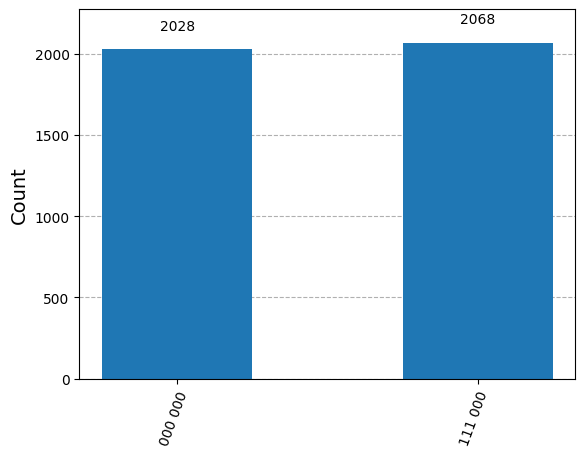

In [83]:
plot_histogram(sim_counts)

# Running on Fake Sherbrooke

In [84]:

from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
backend_man = FakeManilaV2()


In [86]:
qc_man= transpile(qc, backend_man)
qc_man.draw()

global phase: π/4
                                                                 
ancilla_0 -> 0 ──────────────────────────────────────────────────
                                                                 
ancilla_1 -> 1 ──────────────────────────────────────────────────
                                           ┌───┐      ░    ┌─┐   
      q_1 -> 2 ────────────────────────────┤ X ├──────░────┤M├───
               ┌─────────┐┌────┐┌─────────┐└─┬─┘      ░ ┌─┐└╥┘   
      q_0 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────■───░─┤M├─╫────
               └─────────┘└────┘└─────────┘     ┌─┴─┐ ░ └╥┘ ║ ┌─┐
      q_2 -> 4 ─────────────────────────────────┤ X ├─░──╫──╫─┤M├
                                                └───┘ ░  ║  ║ └╥┘
          c: 3/══════════════════════════════════════════╬══╬══╬═
                                                         ║  ║  ║ 
       meas: 3/══════════════════════════════════════════╩══╩══╩═
                                                         0  1  2

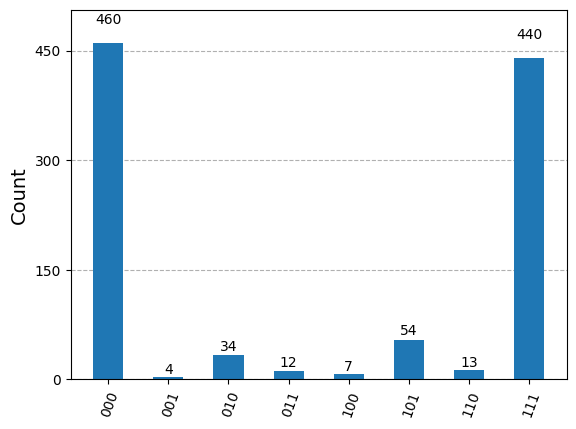

In [87]:
sampler = SamplerV2(backend_man)
job = sampler.run([qc_man])
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)

# Running on real quantum computer

In [88]:
backend = service.least_busy(min_num_qubits=127, operational=True)
backend

<IBMBackend('ibm_brisbane')>

In [89]:
qc2=transpile(qc, backend)


In [90]:
qc2.draw()

global phase: 7π/4
                                                                              »
    ancilla_0 -> 0 ───────────────────────────────────────────────────────────»
                                                                              »
    ancilla_1 -> 1 ───────────────────────────────────────────────────────────»
                                                                              »
    ancilla_2 -> 2 ───────────────────────────────────────────────────────────»
                                                                              »
    ancilla_3 -> 3 ───────────────────────────────────────────────────────────»
                                                                              »
    ancilla_4 -> 4 ───────────────────────────────────────────────────────────»
                                                                              »
    ancilla_5 -> 5 ───────────────────────────────────────────────────────────»
                                                                              »
    ancilla_6 -> 6 ───────────────────────────────────────────────────────────»
                                                                              »
    ancilla_7 -> 7 ───────────────────────────────────────────────────────────»
                                                                              »
    ancilla_8 -> 8 ───────────────────────────────────────────────────────────»
                                                                              »
    ancilla_9 -> 9 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_10 -> 10 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_11 -> 11 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_12 -> 12 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_13 -> 13 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_14 -> 14 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_15 -> 15 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_16 -> 16 ───────────────────────────────────────────────────────────»
                   ┌─────────┐ ┌────┐┌─────────────┐                          »
         q_2 -> 17 ┤ Rz(π/2) ├─┤ √X ├┤ Rz(0.32632) ├──────────────────────────»
                   └─────────┘ └────┘└─────────────┘                          »
  ancilla_17 -> 18 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_18 -> 19 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_19 -> 20 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_20 -> 21 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_21 -> 22 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_22 -> 23 ───────────────────────────────────────────────────────────»
                                                                              »
  ancilla_23 -> 24 ──────────────────────────────────────────

In [91]:
job=backend.run(qc2)
print(job.job_id)

<ipython-input-91-b5e01ff771e7>:1: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job=backend.run(qc2)


<bound method JobV1.job_id of <RuntimeJob('cxfwhgyky7rg0083was0', 'circuit-runner')>>


In [92]:
result = job.result()

In [93]:
counts = result.get_counts(qc2)
print("Result of the quantum circuit:", counts)

Result of the quantum circuit: {'101 000': 74, '010 000': 34, '000 000': 1799, '110 000': 21, '001 000': 50, '011 000': 114, '111 000': 1869, '100 000': 39}


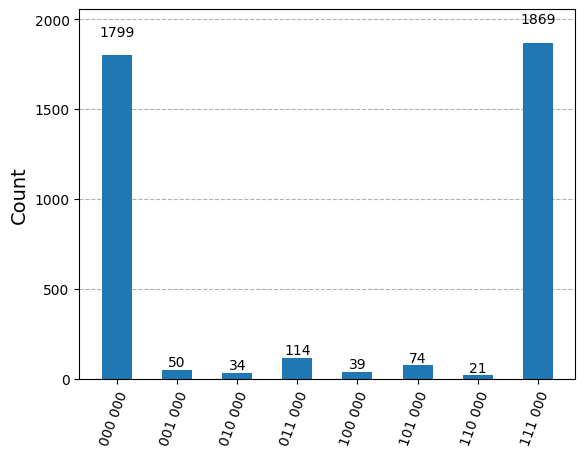

In [94]:
plot_histogram(counts)